<a href="https://colab.research.google.com/github/JBMODSYSTEM/ColabAngelica/blob/main/Lucas_de_Series_Tiempo_EC_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fix_yahoo_finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix_yahoo_finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7072 sha256=3230df05bb680ab2776ac8da2532d99aafee1b59a583e885fa5107a55d254a1f
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix_yahoo_finance


In [ ]:
import fix_yahoo_finance as yf

/usr/local/lib/python3.10/dist-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [ ]:
data_EC = yf.download("EC", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data_EC = yf.download("EC", start="2010-01-01", end="2024-11-12")['Close']

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


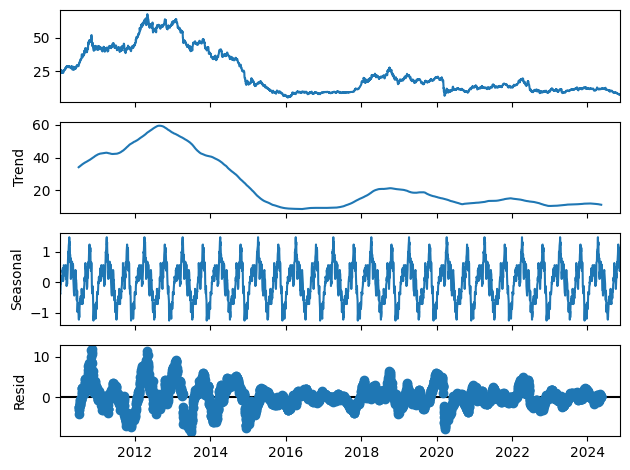

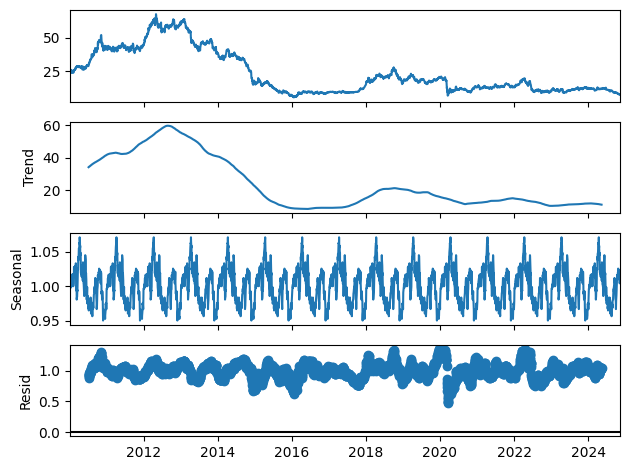

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import yfinance as yf

# 1. Descargar datos de la serie de tiempo
data = yf.download("EC", start="2010-01-01", end="2024-11-12")
data_EC = data['Close']

# Asegurarse de que no existan valores NaN
data_EC = data_EC.ffill().bfill()

# 2. Descomponer la serie de tiempo
decomposition = seasonal_decompose(data_EC, model='additive', period=252)  # Para datos financieros
decomposition.plot()
plt.show()

# 3. Descomponer la serie de tiempo
decomposition = seasonal_decompose(data_EC, model='multiplicative', period=252)  # Para datos financieros
decomposition.plot()
plt.show()


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Train dates : 2010-01-04 00:00:00+00:00 --- 2023-11-23 00:00:00+00:00 (n=3624)
Test dates  : 2023-11-24 00:00:00+00:00 --- 2024-11-11 00:00:00+00:00 (n=252)


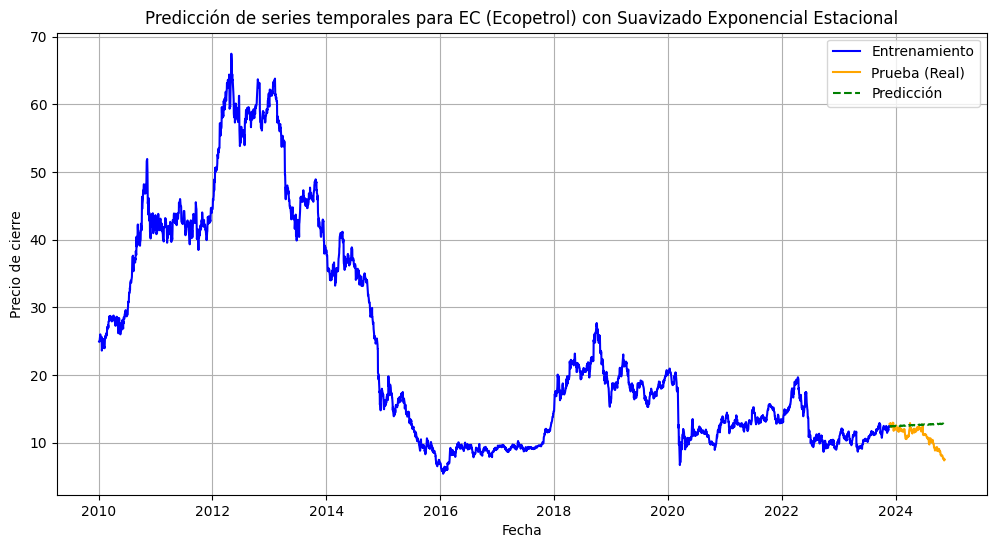

Error cuadrático medio (MSE): 4.8760


In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Descargar datos de EC desde Yahoo Finance
data = yf.download("EC", start="2010-01-01", end="2024-11-12")
data_EC = data['Close']

# Preprocesar los datos
data_EC = data_EC.ffill().bfill()  # Llenar valores faltantes
data_EC.index = pd.to_datetime(data_EC.index)  # Asegurar que el índice sea datetime
data_EC = data_EC.asfreq('B')  # Asegurar frecuencia diaria (días hábiles)
data_EC = data_EC.ffill().bfill()  # Rellenar posibles valores faltantes generados por asfreq

# Dividir en conjuntos de entrenamiento y prueba
steps = 252  # Predicciones para un año de días hábiles
data_train = data_EC[:-steps].copy()
data_test = data_EC[-steps:].copy()

print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()} (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_test.index.max()} (n={len(data_test)})"
)

# Ajustar modelo de Suavizado Exponencial con estacionalidad
# Configuración: tendencia aditiva y estacionalidad aditiva con un período anual (252 días hábiles)
model = ExponentialSmoothing(
    data_train,
    trend="mul",         # Componente de tendencia aditiva
    seasonal="add",      # Componente estacional aditiva add: aditivo, mul: multiplicativo
    seasonal_periods=12 # Período estacional: 252 días hábiles (1 año)
).fit()

# Realizar predicciones
predictions = model.forecast(steps=steps)

# Visualizar predicciones
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train.values, label="Entrenamiento", color="blue")
plt.plot(data_test.index, data_test.values, label="Prueba (Real)", color="orange")
plt.plot(predictions.index, predictions.values, label="Predicción", color="green", linestyle="--")
plt.title("Predicción de series temporales para EC (Ecopetrol) con Suavizado Exponencial Estacional")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.grid()
plt.show()

# Calcular error de predicción
# Alinear índices de data_test y predictions
aligned_test = data_test.loc[predictions.index]
error_mse = mean_squared_error(y_true=aligned_test, y_pred=predictions)
print(f"Error cuadrático medio (MSE): {error_mse:.4f}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


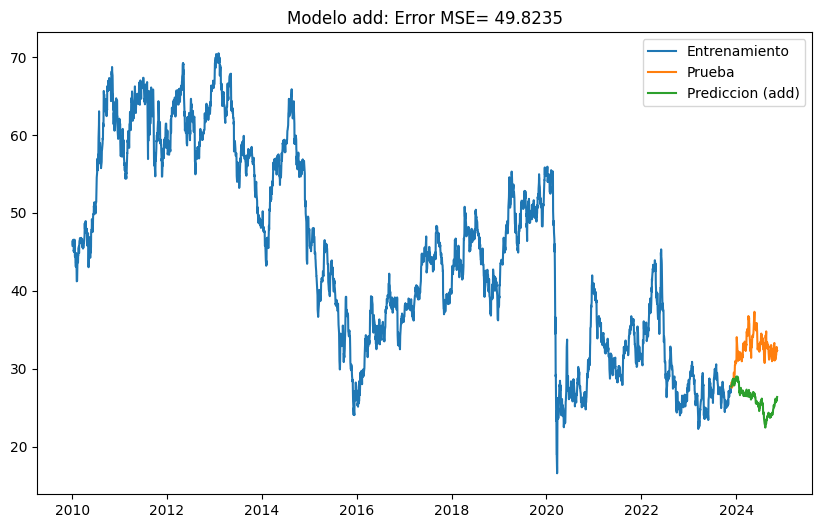

El mejor modelo es el add con un MSW de  49.8235


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


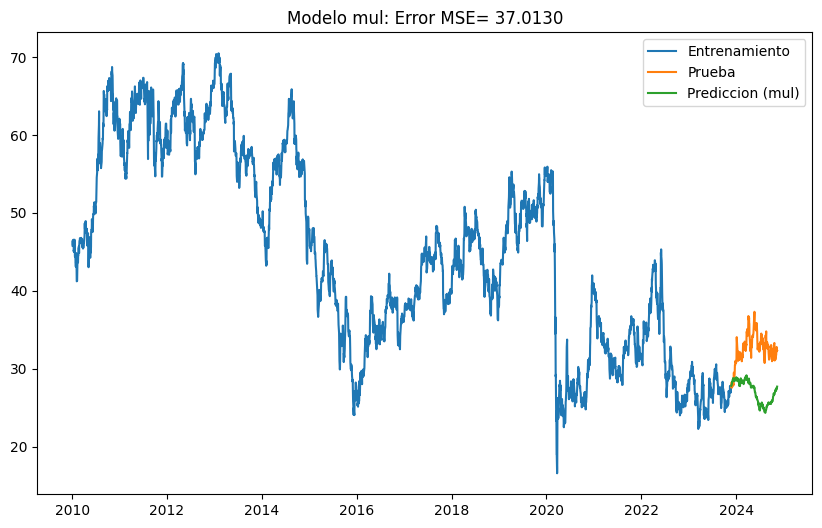

El mejor modelo es el mul con un MSW de  37.0130


In [ ]:
# from sklearn.model_selection import ParameterGrid  # Asegurarse de que ParameterGrid esté importado
# from statsmodels.tsa.holtwinters import ExponentialSmoothing

# # Definir los hiperparámetros a probar
# param_grid = {
#     'trend': ['add', 'mul'],
#     'seasonal': ['add', 'mul'],
#     'seasonal_periods': [252, 12],  # Período estacional: 252 para anual, 52 semanal y 12 para mensual
#     'alpha': [0.2, 0.3, 0.4],
#     'beta': [0.2, 0.3, 0.4],
#     'gamma': [0.2, 0.3, 0.4]
# }


# # Crear el grid de combinaciones de parámetros
# grid = list(ParameterGrid(param_grid))

# # Inicializar una lista para guardar los errores
# results = []

# # Realizar búsqueda de hiperparámetros
# for params in grid:
#     # Ajustar el modelo con los parámetros actuales
#     model = ExponentialSmoothing(
#         data_train,
#         trend=params['trend'],
#         seasonal=params['seasonal'],
#         seasonal_periods=params['seasonal_periods']
#     ).fit(smoothing_level=params['alpha'], smoothing_trend=params['beta'], smoothing_seasonal=params['gamma'])

#     # Realizar predicciones
#     predictions = model.forecast(steps=steps)

#     # Calcular el error (MSE) para la combinación actual
#     error_mse = mean_squared_error(data_test, predictions)
#     results.append((params, error_mse))

# # Ordenar los resultados por MSE
# best_params, best_mse = sorted(results, key=lambda x: x[1])[0]
# print(f"Mejores parámetros: {best_params}")
# print(f"Mejor error MSE: {best_mse:.4f}")


from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

results = {}
best_params = {}

for model_type in ['add', 'mul']:
  model = ExponentialSmoothing(
      data_train,
      trend=model_type,
      seasonal=model_type,
      seasonal_periods=252
  ).fit()


  predictions = model.forecast(steps=len(data_test))

  mse = mean_squared_error(data_test, predictions)
  results[model_type] = mse

  if mse == min(results.values()):
    best_params ={
        'trend' : model_type,
        'seasonal' : model_type,
        'seasonal_periods': 252,
        'alpha': model.params['smoothing_level'],
        'beta': model.params['smoothing_trend'],
        'gamma': model.params['smoothing_seasonal']

    }

  plt.figure(figsize=(10, 6))
  plt.plot(data_train.index, data_train, label= "Entrenamiento")
  plt.plot(data_test.index, data_test, label= "Prueba")
  plt.plot(predictions.index, predictions, label=f"Prediccion ({model_type})")
  plt.title(f"Modelo {model_type}: Error MSE={mse: .4f}")
  plt.legend()
  plt.show()


  best_model = min(results, key=results.get)
  print(f"El mejor modelo es el {best_model} con un MSW de {results[best_model]: .4f}")



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


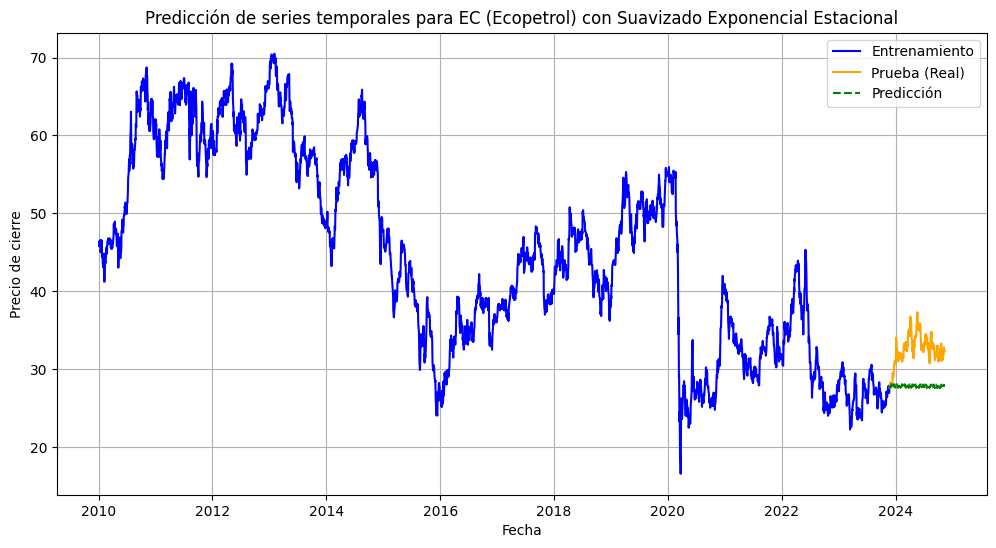

Error cuadrático medio (MSE) final: 26.1920


In [ ]:
# Crear y entrenar el modelo con los mejores parámetros
best_model = ExponentialSmoothing(
    data_train,
    trend=best_params['trend'],
    seasonal=best_params['seasonal'],


    # seasonal_periods=best_params['seasonal_periods'],
    seasonal_periods=12



).fit(
    smoothing_level=best_params['alpha'],
    smoothing_trend=best_params['beta'],
    smoothing_seasonal=best_params['gamma'])

# Predicciones con el modelo ajustado
predictions = best_model.forecast(steps=steps)

# Visualizar predicciones
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train.values, label="Entrenamiento", color="blue")
plt.plot(data_test.index, data_test.values, label="Prueba (Real)", color="orange")
plt.plot(predictions.index, predictions.values, label="Predicción", color="green", linestyle="--")
plt.title("Predicción de series temporales para EC (Ecopetrol) con Suavizado Exponencial Estacional")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.grid()
plt.show()

# Calcular error de predicción
error_mse = mean_squared_error(data_test, predictions)
print(f"Error cuadrático medio (MSE) final: {error_mse:.4f}")

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Train dates : 2010-01-04 00:00:00+00:00 --- 2023-11-23 00:00:00+00:00 (n=3624)
Test dates  : 2023-11-24 00:00:00+00:00 --- 2024-11-11 00:00:00+00:00 (n=252)


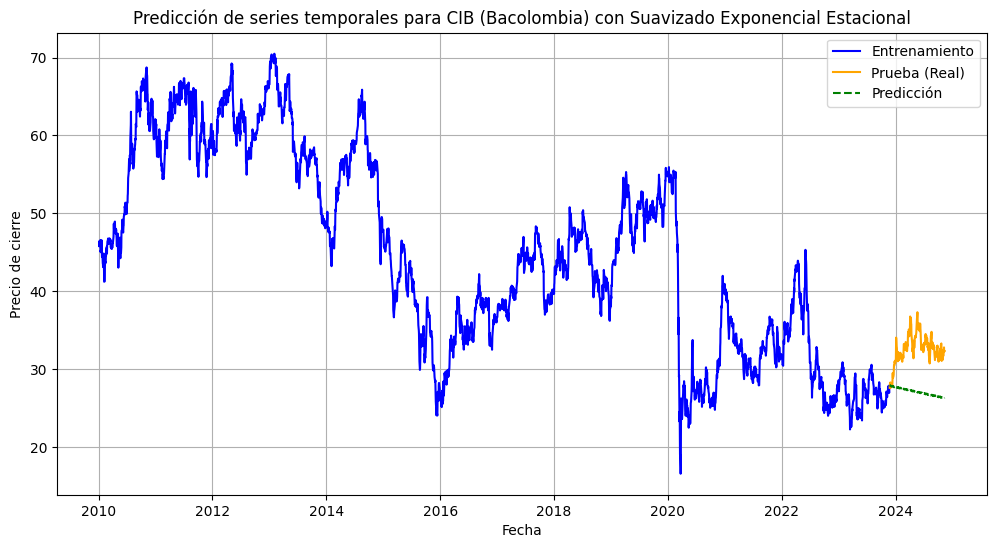

Error cuadrático medio (MSE): 34.6096


In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Descargar datos de CIB desde Yahoo Finance
data = yf.download("CIB", start="2010-01-01", end="2024-11-12")
data_CIB = data['Close']

# Preprocesar los datos
data_CIB = data_CIB.ffill().bfill()  # Llenar valores faltantes
data_CIB.index = pd.to_datetime(data_CIB.index)  # Asegurar que el índice sea datetime
data_CIB = data_CIB.asfreq('B')  # Asegurar frecuencia diaria (días hábiles)
data_CIB = data_CIB.ffill().bfill()  # Rellenar posibles valores faltantes generados por asfreq

# Dividir en conjuntos de entrenamiento y prueba
steps = 252  # Predicciones para un año de días hábiles
data_train = data_CIB[:-steps].copy()
data_test = data_CIB[-steps:].copy()

print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()} (n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_test.index.max()} (n={len(data_test)})"
)

# Ajustar modelo de Suavizado Exponencial con estacionalidad
# Configuración: tendencia aditiva y estacionalidad aditiva con un período anual (252 días hábiles)
model = ExponentialSmoothing(
    data_train,
    trend="mul",         # Componente de tendencia aditiva
    seasonal="add",      # Componente estacional aditiva add: aditivo, mul: multiplicativo
    seasonal_periods=12 # Período estacional: 252 días hábiles (1 año)
).fit()

# Realizar predicciones
predictions = model.forecast(steps=steps)

# Visualizar predicciones
plt.figure(figsize=(12, 6))
plt.plot(data_train.index, data_train.values, label="Entrenamiento", color="blue")
plt.plot(data_test.index, data_test.values, label="Prueba (Real)", color="orange")
plt.plot(predictions.index, predictions.values, label="Predicción", color="green", linestyle="--")
plt.title("Predicción de series temporales para CIB (Bacolombia) con Suavizado Exponencial Estacional")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre")
plt.legend()
plt.grid()
plt.show()

# Calcular error de predicción
# Alinear índices de data_test y predictions
aligned_test = data_test.loc[predictions.index]
error_mse = mean_squared_error(y_true=aligned_test, y_pred=predictions)
print(f"Error cuadrático medio (MSE): {error_mse:.4f}")